# Exploratory Data Analysis on Bread_Basket dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1=pd.read_csv('C:\\Users\\Nelson\\Documents\\ML_Dataset\\bread_basket.csv')

In [3]:
df1

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [307]:
df1.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

In [34]:
df1['date_time']=pd.to_datetime(df1['date_time'])

EDA on the dataset

In [301]:
df1.isna().any()

Transaction        False
Item               False
date_time          False
period_day         False
weekday_weekend    False
dtype: bool

In [303]:
df1['weekday_weekend'].unique()

array(['weekend', 'weekday'], dtype=object)

In [312]:
df1.groupby(by='Transaction').get_group(67)

,Transaction,Item,date_time,period_day,weekday_weekend
140,67,Hearty & Seasonal,30-10-2016 13:46,afternoon,weekend
141,67,Mineral water,30-10-2016 13:46,afternoon,weekend
142,67,Muffin,30-10-2016 13:46,afternoon,weekend


In [313]:
df1['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [319]:
df1['weekday_weekend'].unique()

array(['weekend', 'weekday'], dtype=object)

In [321]:
df1['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

How was the sales b/w weekend vs weekday

In [328]:
w_c=df1.groupby(by='weekday_weekend')['weekday_weekend'].count()
w_c

weekday_weekend
weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

<BarContainer object of 2 artists>

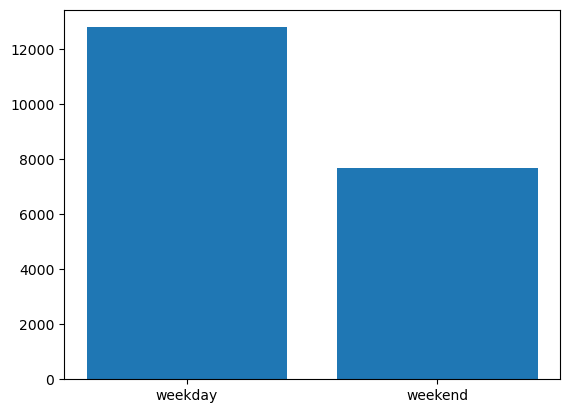

In [330]:
fig=plt.figure()
ax=fig.add_axes(111)
ax.bar(w_c.index,w_c)

That's amazing but let's findout why the weekend sales were lesser thans week day 

In [341]:
w_m=df1[(df1['weekday_weekend']=='weekend') & (df1['period_day']=='morning')]
w_n=df1[(df1['weekday_weekend']=='weekend') & (df1['period_day']=='afternoon')]
w_e=df1[(df1['weekday_weekend']=='weekend') & (df1['period_day']=='evening')]
w_d=df1[(df1['weekday_weekend']=='weekend') & (df1['period_day']=='night')]

In [350]:
d_m=df1[(df1['weekday_weekend']=='weekday') & (df1['period_day']=='morning')]
d_n=df1[(df1['weekday_weekend']=='weekday') & (df1['period_day']=='afternoon')]
d_e=df1[(df1['weekday_weekend']=='weekday') & (df1['period_day']=='evening')]
d_d=df1[(df1['weekday_weekend']=='weekday') & (df1['period_day']=='night')]

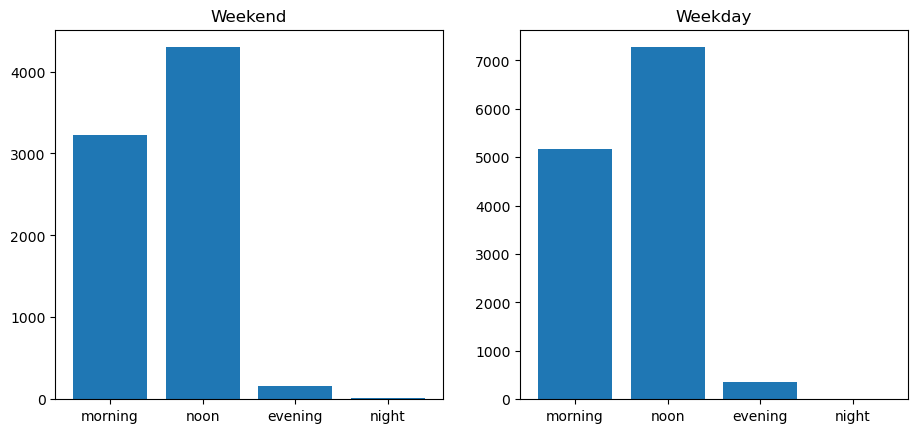

In [356]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].bar(['morning','noon','evening','night'],[len(w_m),len(w_n),len(w_e),len(w_d)])
ax[0].set_title('Weekend')
ax[1].bar(['morning','noon','evening','night'],[len(d_m),len(d_n),len(d_e),len(d_d)])
ax[1].set_title('Weekday')
fig.set_figwidth(11)

If we look at the above graph the trends are exactly same but the scale in no. of customers visiting the bakery varies.

Tips to improve:
1. Produce less amount of items in the weekend based on the demand
2. Sell unique items which will be made available only during the weekend
3. Give promos/discounts for the few products(can be found by frequent pattern algo's) only during the weekend

How was the month-wise sales in the bakery?

In [58]:
m_c=df1.groupby(by=df1['date_time'].dt.month)['Item'].count()

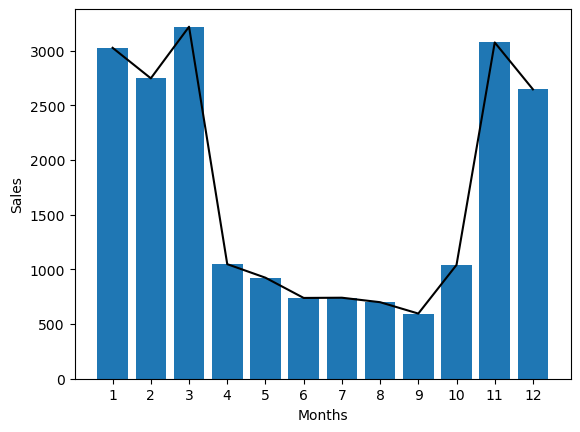

In [391]:
fig=plt.figure()
ax=fig.add_axes(111)
b=ax.bar(m_c.index,m_c)
ax.set_xticks(m_c.index)
ax.set_xlabel('Months')
ax.set_ylabel('Sales')
line=ax.plot(m_c,color='black')

The above barplot shows Bi-modal distribution as it has two peaks. In Bi-modal distribution, distribution of data will have two peaks seperated by a group in between them. Basically the two peaks might represent two seperate groups and it may require to be seperated using Gaussian mixture modeling (GMM) when we are attempting to create a model out of it.


From above plot we can infer that 'March' month has highest sales record and there is a sudden decrease in sales after March.

In [395]:
m_a=df1.groupby(by=df1['date_time'].dt.month)

In [398]:
m=m_a.get_group(3)

In [399]:
a=m_a.get_group(4)

Period wise comparison b/w March vs April

In [411]:
m_s=m['period_day'].value_counts()

In [412]:
a_s=a['period_day'].value_counts()

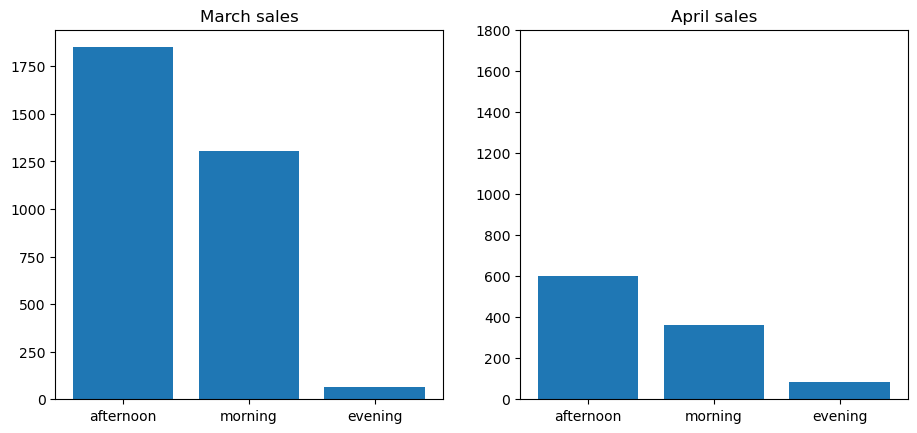

In [415]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].bar(m_s.index,m_s)
ax[0].set_title('March sales')
ax[1].bar(a_s.index,a_s)
ax[1].set_title('April sales')
ax[1].set_ylim(0,1800)
fig.set_figwidth(11)

Product wise commparison b/w March vs April

In [416]:
m_p=m['Item'].value_counts()
a_p=a['Item'].value_counts()

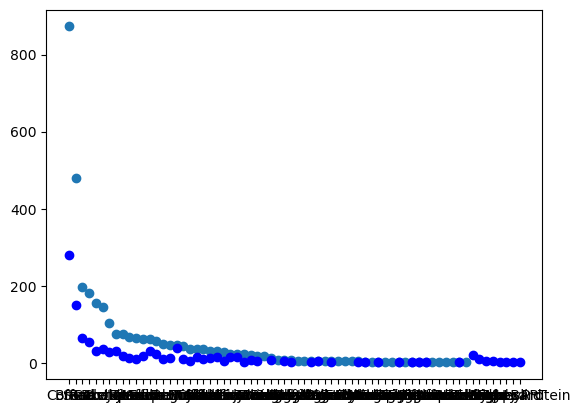

In [424]:
plt.scatter(m_p.index,m_p)
plt.scatter(a_p.index,a_p,color='b')

Year wise comparison b/w March & April

In [433]:
a['date_time'].dt.year.value_counts()

2017    740
2016    308
Name: date_time, dtype: int64

In [464]:
m['date_time'].dt.year.value_counts()

2017    2840
2016     380
Name: date_time, dtype: int64

The above O/Ps clearly shows that in the year 2017 there was a huge gap in sales count b/w March and April,

Day wise comparison for the year 2017 b/w March and April

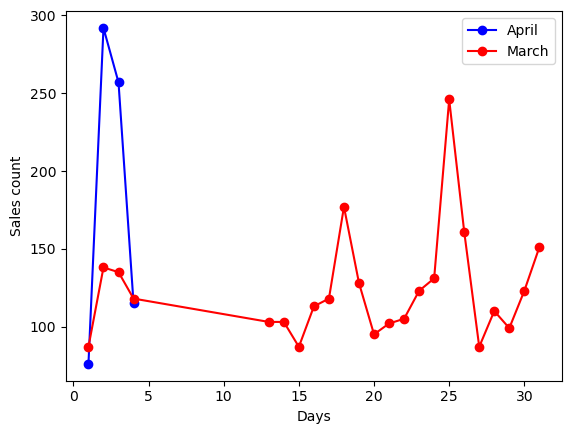

In [463]:
a_l=a[a['date_time'].dt.year==2017]['date_time'].dt.day.value_counts()
m_l=m[m['date_time'].dt.year==2017]['date_time'].dt.day.value_counts()
plt.plot(a_l.sort_index().index,a_l.sort_index().values,'bo-',label='April day wise sales')
plt.plot(m_l.sort_index().index,m_l.sort_index().values,'ro-',label='March day wise sales')
plt.xlabel('Days')
plt.ylabel('Sales count')
plt.legend(['April','March'])

# It is evident from the above line plot that there was no sales records after 4th April in the year 2017 which could be a reason for sudden decrease in sales

Max dates in the every month for every year 2016 & 2017

In [88]:
yearwise_month=p_d.groupby(by=['year','month'])['it'].count()
num_records=p_d.groupby(by=['year','month'])['date'].max()

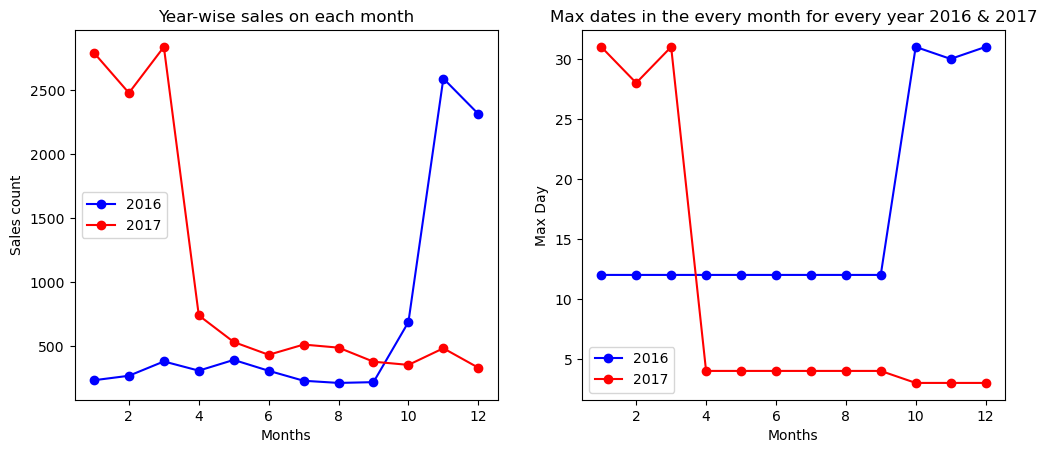

In [95]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].plot(yearwise_month[2016].index,yearwise_month[2016].values,'bo-')
ax[0].plot(yearwise_month[2017].index,yearwise_month[2017].values,'ro-')
ax[0].set_xlabel('Months')
ax[0].set_ylabel('Sales count')
ax[0].legend(['2016','2017'])
ax[0].set_title('Year-wise sales on each month')
ax[1].plot(num_records[2016].index,num_records[2016].values,'bo-')
ax[1].plot(num_records[2017].index,num_records[2017].values,'ro-')
ax[1].set_xlabel('Months')
ax[1].set_ylabel('Max Day')
ax[1].legend(['2016','2017'])
ax[1].set_title('Max dates in the every month for every year 2016 & 2017')
fig.set_figwidth(12)

From the above line plot it is pretty evident that months with less no of distribution in dates have less sales. Fixing this data issue can give better analysis on the bakery sales

# X-mas and New year sales analysis

Obviously, from the above line plot we can see that in 2016 there was a good amount of sales happened b/w Christmas season of 2016 & New year 2017. So I'm considering this period as my analysis

Top10 product sold in high amount during these days?

In [110]:
ny=p_d.loc[(p_d['year']==2017) & ((p_d['month']==1)|(p_d['month']==2))]
print("Total sales of New year is: ",ny[['it']].count())

Total sales of New year is:  it    5274
dtype: int64


In [112]:
cs=p_d.loc[(p_d['year']==2016) & ((p_d['month']==11)|(p_d['month']==12))]
print("Total sales of Xmas is: ",cs[['it']].count())

Total sales of Xmas is:  it    4909
dtype: int64


In [133]:
nt=ny['it'].value_counts().reset_index(name='Count').rename(columns={"index":"Items"})[:10]
nt

,Items,Count
0,Coffee,1350
1,Bread,849
2,Tea,395
3,Cake,340
4,Sandwich,214
5,Pastry,193
6,Hot chocolate,160
7,Cookies,157
8,Medialuna,139
9,Alfajores,117


In [134]:
ct=cs['it'].value_counts().reset_index(name='Count').rename(columns={"index":"Items"})[:10]
ct

,Items,Count
0,Coffee,1363
1,Bread,886
2,Tea,339
3,Medialuna,228
4,Pastry,197
5,Hot chocolate,179
6,Cake,175
7,Sandwich,150
8,Farm House,110
9,Muffin,109


How much christmas or new year sales contributes to each year

In [146]:
tot=p_d.groupby(by='year')['it'].count()
print("New year % of sales in 2017: ",(ny[['it']].count()/tot[2017])*100)
print("Christmas season % of sales in 2016: ",(cs[['it']].count()/tot[2016])*100)

New year % of sales in 2017:  it    42.659549
dtype: float64
Christmas season % of sales in 2016:  it    60.277505
dtype: float64


# How was the sales at the beginning of the month and at the end of the month

As we already know that there are some months in the dataset doesn't have end of the month records, so we are ignoring those months for this analysis.

As we have concrete sales data for both month_start and month_end we are selecting 'Jan,Feb' month of 2017

In [264]:
end=p_d.loc[(p_d['date']>=25)].groupby(by='month')['it'].count()[0:2]

In [267]:
start=p_d.loc[(p_d['date']<=10)&(p_d['month']<3)].groupby(by='month')['it'].count()

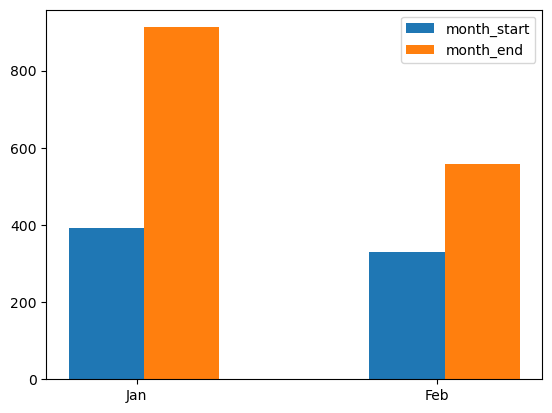

In [273]:
n=np.arange(0,2)
fig=plt.figure()
ax=fig.add_axes(111)
ax.bar(n,start,width=0.25)
ax.bar(n+0.25,end,width=0.25)
ax.set_xticks(n+0.1,labels=['Jan','Feb'])
ax.legend(['month_start','month_end'])

As per the analysis of the above graph, more transactions were done during month_end of Jan & Feb

# Frequent itemset analysis using Apriori Algorithm

In [305]:
from mlxtend.frequent_patterns import apriori,association_rules

Apriori can be implemented by two ways:
    1. using apyori module
    2. mlxtend library

We are using mlxtend library because the same pre-processed dataset can be used for Apriori and FP growth algorithm

In [279]:
df1['Item']=df1['Item'].str.strip()
df1['Item']=df1['Item'].str.lower()

# Data Preprocessing

Input dataset to the Apriori method should contain only boolean values. (i.e. if the item is present in the transaction then 1 else 0)

In [291]:
g=df1.groupby(by=['Transaction','Item'])['Item'].count().reset_index(name='count')
g

,Transaction,Item,count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [295]:
pivot_t=g.pivot_table(index='Transaction',columns='Item',values='count',aggfunc='sum',fill_value=0)

In [297]:
def func(x):
    if(x<=0):
        return 0
    if(x>0):
        return 1
input_t=pivot_t.applymap(func)

Above resulting pivot table will help us to acheive the desired input boolean dataset which is required for Apriori algorithm/

In [306]:
itemsets=apriori(input_t,min_support=0.02,use_colnames=True)
#min-support=0.02 (means the frequent itemsets that are selected shold appear in atleast 20% of the transactions)

C:\Users\Nelson\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [307]:
itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.327205,(bread)
2,0.040042,(brownie)
3,0.103856,(cake)
4,0.478394,(coffee)
5,0.054411,(cookies)
6,0.039197,(farm house)
7,0.058320,(hot chocolate)
8,0.038563,(juice)
9,0.061807,(medialuna)


# Association rule mining from the frequent itemsets

In [309]:
association_rules(itemsets,metric='confidence',min_threshold=0.3).loc[:,'antecedents':'lift']

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977
1,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515
2,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723
3,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311
4,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750
5,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878
6,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168
7,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792
8,(tea),(coffee),0.142631,0.478394,0.049868,0.349630,0.730840
9,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431


The above association rule have lift values >1 which indicates that these rules are more releveant from the given dataset.

How interpret the above table??

Let's take first record: 0	(pastry)	(bread)	0.086107	0.327205	0.029160	0.338650	1.034977
If customer buys pastry then there is a confidence of 33% that he'll buys bread as well.

Apriori Algorithm suffers from few disadvantages:

1. For every iteration candidate table has to be generated.
2. For finding frequency of each itemset everytime whole database has to be scanned.

These disadvantages can be resolved by FP (Frequent pattern) Growth Algorithm

# Frequent itemset analysis using FP (Frequent pattern) Growth Algorithm

In [310]:
from mlxtend.frequent_patterns import fpgrowth

In [314]:
itemset_f=fpgrowth(input_t,min_support=0.02,use_colnames=True)

C:\Users\Nelson\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [315]:
itemset_f

,support,itemsets
0,0.327205,(bread)
1,0.029054,(scandinavian)
2,0.058320,(hot chocolate)
3,0.054411,(cookies)
4,0.038457,(muffin)
5,0.478394,(coffee)
6,0.086107,(pastry)
7,0.061807,(medialuna)
8,0.142631,(tea)
9,0.039197,(farm house)


The above are the frequent itemsets that are genereated by FP growth algorithm

# Association rule mining from the frequent itemsets

Calculating association rules for the frequent itemsets generated by FP growth algorithm

In [317]:
association_rules(itemset_f,metric='confidence',min_threshold=0.3).loc[:,'antecedents':'lift']

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311
1,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723
2,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977
4,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878
5,(tea),(coffee),0.142631,0.478394,0.049868,0.349630,0.730840
6,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515
8,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792
9,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431


Summarization of sales on Grocery Dataset using pivot table

In [44]:
p_d=pd.DataFrame({'month':df1['date_time'].dt.month,'year':df1['date_time'].dt.year,'date':df1['date_time'].dt.day,'it':df1['Item']})

In [45]:
p_d

,month,year,date,it
0,10,2016,30,Bread
1,10,2016,30,Scandinavian
2,10,2016,30,Scandinavian
3,10,2016,30,Hot chocolate
4,10,2016,30,Jam
...,...,...,...,...
20502,9,2017,4,Coffee
20503,9,2017,4,Tea
20504,9,2017,4,Coffee
20505,9,2017,4,Pastry


In [56]:
p_d.pivot_table(index='it',columns=['year','month'],aggfunc='count',fill_value=0,margins=True,observed=True)

date                                               \
year                     2016                                                
month                       1    2    3    4    5    6    7    8    9   10   
it                                                                           
Adjustment                  0    0    0    0    0    0    0    0    1    0   
Afternoon with the baker    0    0    0    0    0    0    0    0    0    0   
Alfajores                   5   11   12    9    6   18    6    9    5    7   
Argentina Night             0    0    0    0    0    0    0    0    0    0   
Art Tray                    0    0    0    0    0    0    0    2    0    4   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Valentine's card            0    0    0    0    0    0    0    0    0    0   
Vegan Feast                 0    0    0    0    0    0    0    0    0    0   
Vegan mincepie              0    0    0    0    0    0    0    1    0    2   
Victorian Sponge            1    0    0    0    1    1    0    0    0    3   
All                       233  268  380  308  392  307  229  212  218  688   

                          ...                                               \
year                      ... 2017                                           
month                     ...    4    5    6    7    8    9   10   11   12   
it                        ...                                                
Adjustment                ...    0    0    0    0    0    0    0    0    0   
Afternoon with the baker  ...    0    6    2    1    3    0    1    3    2   
Alfajores                 ...    6   10    7    8   10    3    3    4    4   
Argentina Night           ...    0    0    0    0    4    0    0    1    0   
Art Tray                  ...    1    0    1    0    1    0    0    2    0   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Valentine's card          ...    5    0    0    0    0    2    1    1    0   
Vegan Feast               ...    2    0    0    0    7    0    1    1    1   
Vegan mincepie            ...    0    1    0    0    2    0    1    0    2   
Victorian Sponge          ...    0    0    0    0    0    0    0    0    0   
All                       ...  740  532  432  512  488  378  353  483  331   

                                 
year                        All  
month                            
it                               
Adjustment                    1  
Afternoon with the baker     44  
Alfajores                   369  
Argentina Night               7  
Art Tray                     38  
...                         ...  
Valentine's card             13  
Vegan Feast                  16  
Vegan mincepie               54  
Victorian Sponge              7  
All                       20507  

[95 rows x 25 columns]